## Домашнее задание №5

### Этап 2 Включите признаки, полученные из текстовых данных в обучающую выборку.

Импорт необходимых библиотек, необходимых для выполнения второго этапа

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import re

Загрузка данных из датасета fetch_20newsgroups. В качестве категорий были выбраны comp.graphics, rec.sport.hockey, sci.space.

In [22]:
categories = ['comp.graphics', 'rec.sport.hockey', 'sci.space']
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

In [23]:
texts = newsgroups_data.data
labels = newsgroups_data.target
print(f"Количество текстов: {len(texts)}")
print(f"Примеры категорий: {newsgroups_data.target_names}")

Количество текстов: 2959
Примеры категорий: ['comp.graphics', 'rec.sport.hockey', 'sci.space']


Токенизация, преобразование текста, удаление стоп-слов и лемматизация

In [34]:
#nltk.download('all')

In [25]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

Предобработка текста 

In [26]:
def preprocess_text(text):
    text = text.lower() #Приводим к нижнему регистру
    text = re.sub(r'[^\w\s]', '', text) #Удаление пунктуации
    text = re.sub(r'\d+', '', text) #Удаление цифр
    tokens = word_tokenize(text) #Токенизация
    tokens = [word for word in tokens if word not in stop_words] #Удаление стоп-слов
    tokens = [lemmatizer.lemmatize(word) for word in tokens] #Лемматизация
    return ' '.join(tokens)

processed_texts = [preprocess_text(text) for text in texts]
print(f"Пример до обработки:\n{texts[0][:300]}")
print(f"\nПример после обработки:\n{processed_texts[0][:300]}")

Пример до обработки:

    Yes.  There are many methods of rendering, raytracing is one of them.
You didn't say what you mean by rendering, so I won't guess.  Methods of
rendering include:

        o  Pencil and graph paper, doing the math by hand

        o  Wireframe rendering of the 2D projection

        o  Hidden li

Пример после обработки:
yes many method rendering raytracing one didnt say mean rendering wont guess method rendering include pencil graph paper math hand wireframe rendering projection hidden line rendering scanline rendering using painter algorithm bsp tree z buffer raytracing radiosity holographic projection film combin


Векторизация токентов с использованием TF-IDF

In [27]:
#Настройка TF-IDF векторизатора
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(processed_texts)
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print(f"Размер матрицы признаков: {X_tfidf.shape}")

Размер матрицы признаков: (2959, 5000)


Обучние модели на полученном DF

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, labels, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Оценка качества модели
print(classification_report(y_test, y_pred, target_names=newsgroups_data.target_names))

                  precision    recall  f1-score   support

   comp.graphics       0.88      0.88      0.88       297
rec.sport.hockey       0.94      0.88      0.91       299
       sci.space       0.82      0.88      0.85       292

        accuracy                           0.88       888
       macro avg       0.88      0.88      0.88       888
    weighted avg       0.88      0.88      0.88       888



### Этап 3 Примените нейросети для задачи NLP.

In [29]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

categories = ['comp.graphics', 'rec.sport.hockey', 'sci.space']
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

texts = newsgroups_data.data
labels = newsgroups_data.target

max_words = 10000  #Максимальное количество слов в словаре
max_len = 200      #Максимальная длина текстов

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

X_seq = tokenizer.texts_to_sequences(texts)  # Преобразуем тексты в числовые последовательности
X_padded = pad_sequences(X_seq, maxlen=max_len)  #Дополняем или обрезаем последовательности до max_len

X_train, X_test, y_train, y_test = train_test_split(X_padded, labels, test_size=0.3, random_state=42)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),  #Векторизация слов
    Conv1D(128, 5, activation='relu'),  #Сверточный слой
    GlobalMaxPooling1D(),               #Максимальное объединение
    Dense(64, activation='relu'),       #Полносвязный слой
    Dropout(0.5),                       #Dropout для регуляризации
    Dense(len(categories), activation='softmax')  #Выходной слой
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\23202\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.3377 - loss: 1.0984 - val_accuracy: 0.6482 - val_loss: 1.0569
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6823 - loss: 0.9579 - val_accuracy: 0.7952 - val_loss: 0.6407
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8876 - loss: 0.4429 - val_accuracy: 0.8482 - val_loss: 0.3795
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9649 - loss: 0.1470 - val_accuracy: 0.8867 - val_loss: 0.2908
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9706 - loss: 0.0859 - val_accuracy: 0.8723 - val_loss: 0.3075


In [32]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8909 - loss: 0.2947
Accuracy: 0.89


Для наглядности были построены графики точности и потерь для обученной модели

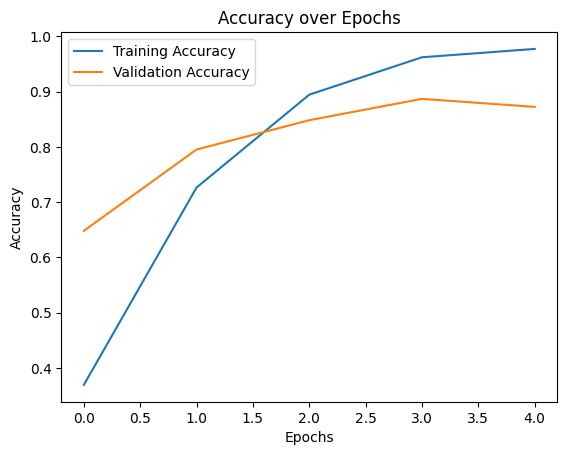

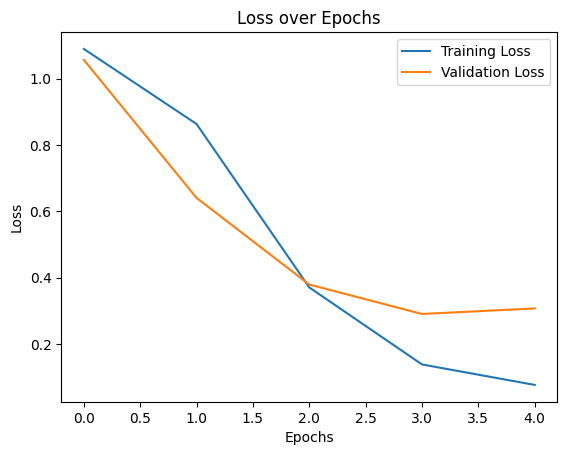

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()